Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  target  
0  0.0   6.0       0  

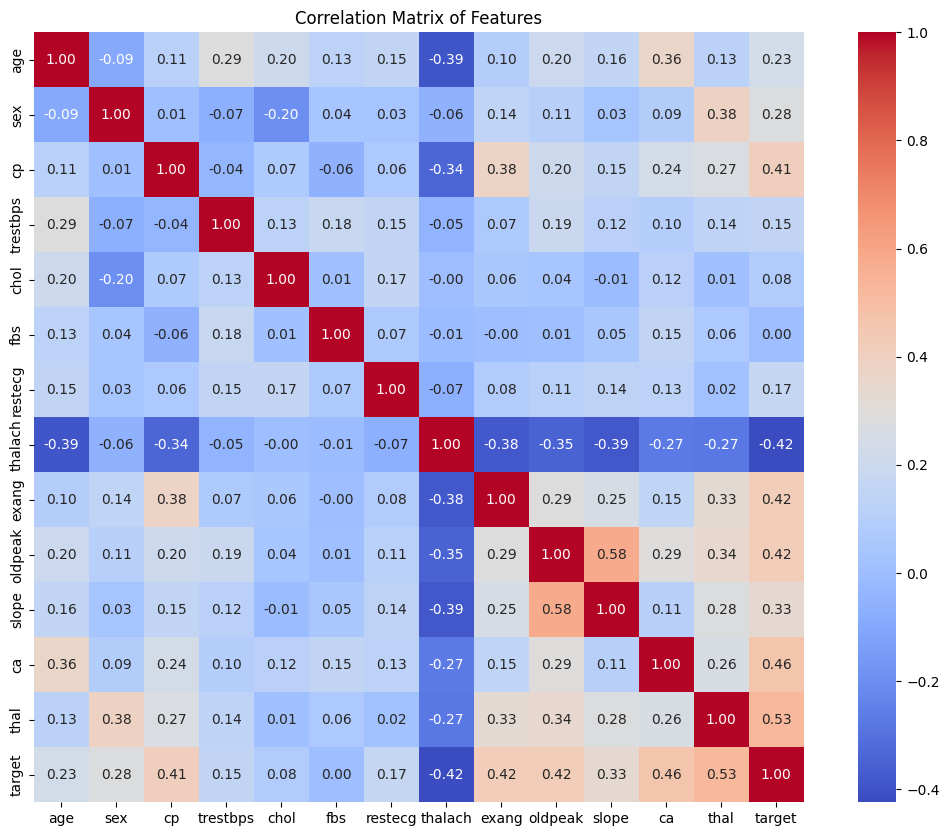

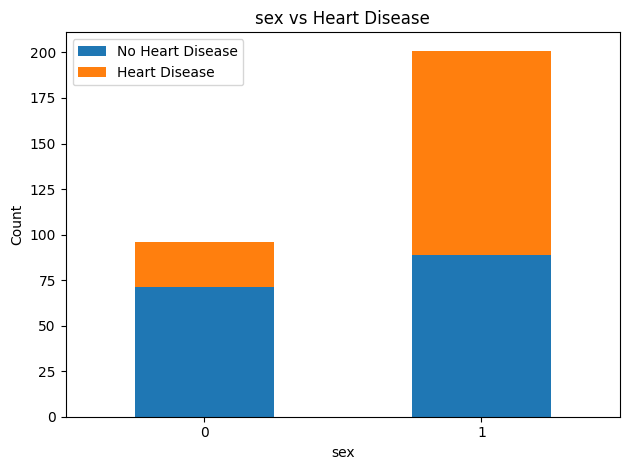

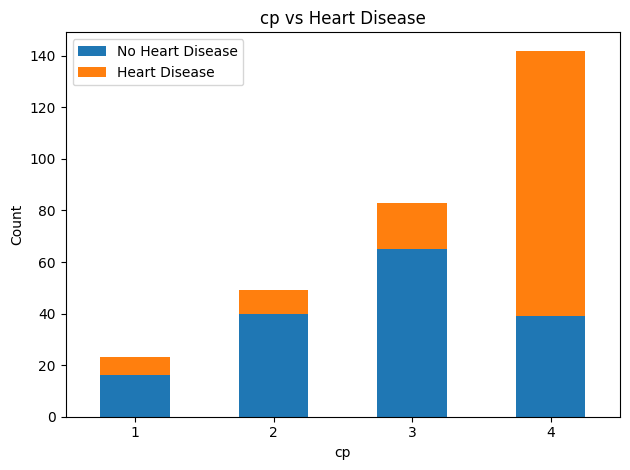

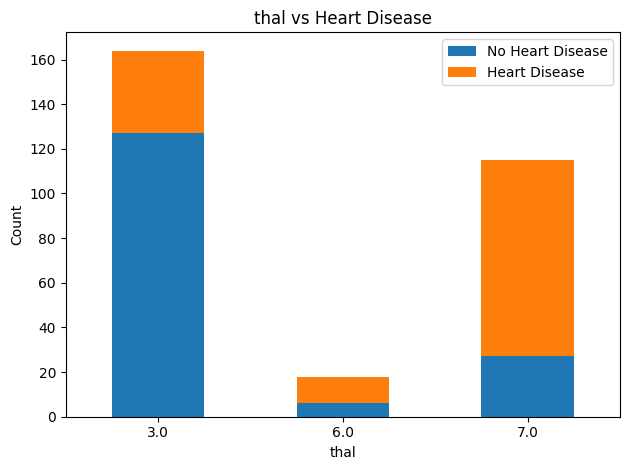

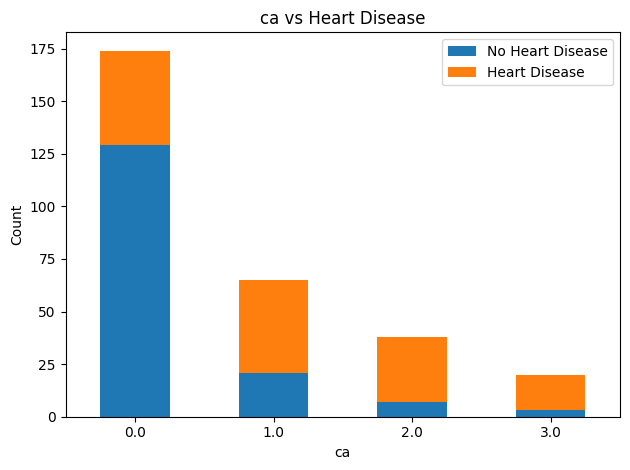

Model  Runtime  Accuracy  Precision  Recall       F1
  SVM 0.002012       0.9   0.900478     0.9 0.899177
         Model  Runtime  Accuracy  Precision   Recall       F1
Neural Network 0.183927  0.833333   0.837104 0.833333 0.834286


/home/parallels/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


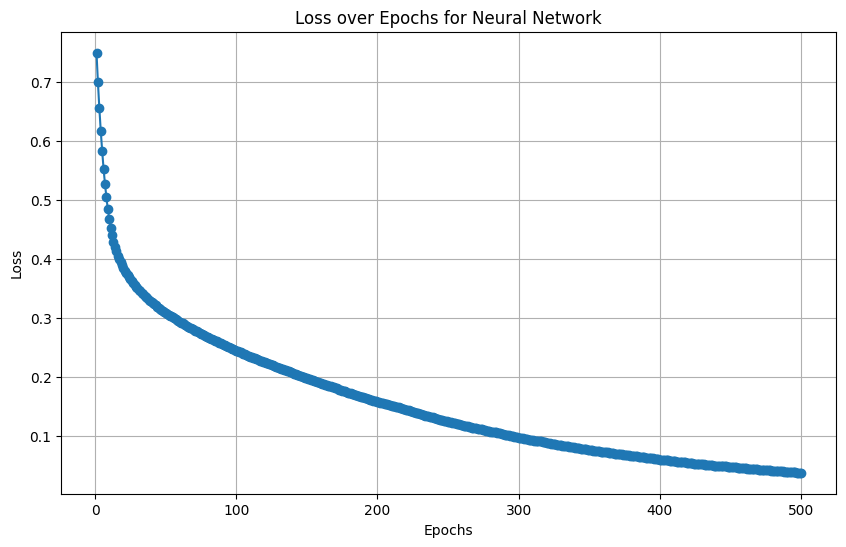

        Model  Runtime  Accuracy  Precision   Recall       F1
Random Forest 0.059023  0.833333   0.833333 0.833333 0.833333
              Model  Runtime  Accuracy  Precision   Recall       F1
K-Nearest Neighbors 0.000442  0.916667   0.916569 0.916667 0.916351
              Model  Runtime  Accuracy  Precision   Recall       F1
                SVM 0.002012  0.900000   0.900478 0.900000 0.899177
     Neural Network 0.183927  0.833333   0.837104 0.833333 0.834286
      Random Forest 0.059023  0.833333   0.833333 0.833333 0.833333
K-Nearest Neighbors 0.000442  0.916667   0.916569 0.916667 0.916351


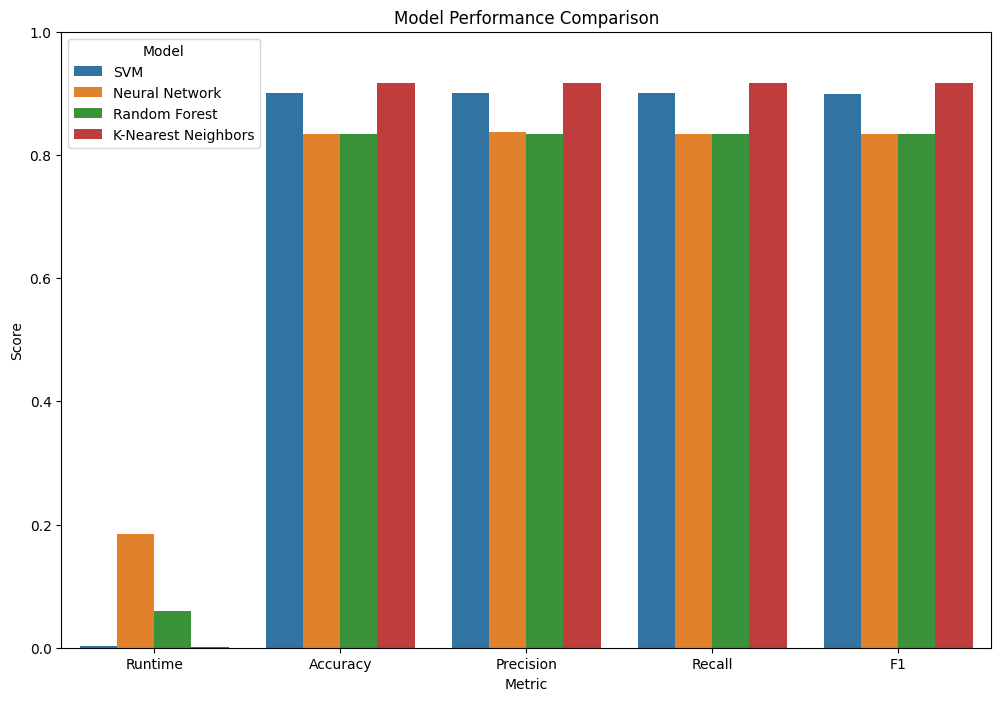

In [2]:
%run model_training.ipynb

In [15]:

def tune_hyperparameters(model, param_grid, model_name):
    grid = GridSearchCV(model, param_grid, scoring='accuracy')
    train_and_evalaute_model(grid, f'GridSearch {model_name}')
    print(f"Best {model_name} parameters:", grid.best_params_)



         Model  Runtime  Accuracy  Precision   Recall      F1
GridSearch SVM 3.531439  0.866667   0.866507 0.866667 0.86557
Best SVM parameters: {'C': 1, 'gamma': 1, 'kernel': 'linear'}


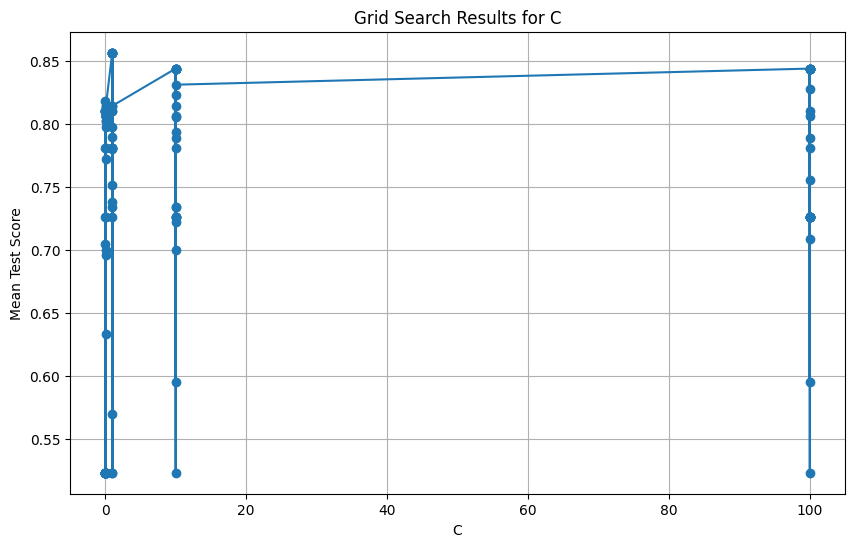

ValueError: could not convert string to float: 'auto'

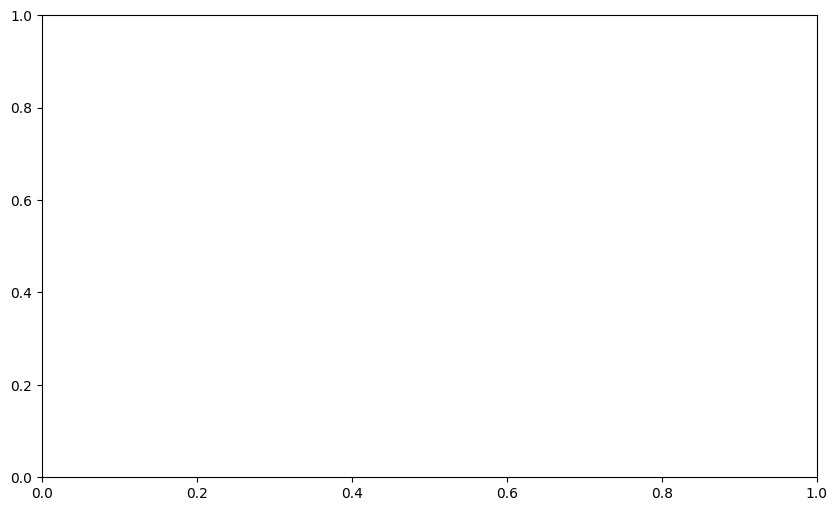

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid_svm = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001, 'auto', 'scale'],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

tune_hyperparameters(svm, param_grid_svm, 'SVM')


In [26]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
tune_hyperparameters(knn, param_grid_knn, 'KNN')


         Model  Runtime  Accuracy  Precision   Recall       F1
GridSearch KNN 0.797074  0.883333   0.882961 0.883333 0.882891
Best KNN parameters: {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}


In [27]:
param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],

}
tune_hyperparameters(nn, param_grid_nn, 'NN')


c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Opti

        Model    Runtime  Accuracy  Precision   Recall       F1
GridSearch NN 203.963579  0.883333   0.884571 0.883333 0.883702
Best NN parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'adaptive', 'solver': 'sgd'}


In [28]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]

}
tune_hyperparameters(rf, param_grid_rf, 'RF')

c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in valid

        Model    Runtime  Accuracy  Precision   Recall       F1
GridSearch RF 216.690984  0.883333   0.884571 0.883333 0.883702
Best RF parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
